In [1]:
# Setup paths
import sys
import os

# Ensure project root is in sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
# Imports
import pandas as pd
from src.data_ingestion import load_raw_data
from data_analysis.initial_inspection import inspect_dataframe
from data_analysis.missing_values_analysis import missing_values_table, plot_missing_heatmap
from data_analysis.univariate_analysis import plot_numeric_distributions, plot_categorical_counts
from data_analysis.bivariate_analysis import plot_numeric_vs_target, plot_categorical_vs_target
from data_analysis.multivariate_analysis import (plot_correlation_matrix, plot_pairplot_sample, plot_cramers_v_heatmap)

In [3]:
# Load data
raw_data_path = os.path.join(project_root, "data/raw/Telco-Customer-Churn.csv")
df = load_raw_data(raw_data_path)

2025-06-24 18:43:30.514 | INFO     | src.data_ingestion:load_raw_data:11 - Loading raw data from d:\NEW_VOLUME_E\BUNNY_FILES\VSCodeProjects\MLOps-Credit-Card-Fraud-Detection\data/raw/Telco-Customer-Churn.csv
2025-06-24 18:43:31.282 | INFO     | src.data_ingestion:load_raw_data:16 - Loaded raw data: 7043 rows, 21 columns


In [4]:
# Initial inspection
inspect_dataframe(df)

2025-06-23 16:36:11.800 | INFO     | data_analysis.initial_inspection:inspect_dataframe:8 - DataFrame head:
2025-06-23 16:36:11.809 | INFO     | data_analysis.initial_inspection:inspect_dataframe:11 - DataFrame tail:
2025-06-23 16:36:11.818 | INFO     | data_analysis.initial_inspection:inspect_dataframe:13 - DataFrame info:
2025-06-23 16:36:11.828 | INFO     | data_analysis.initial_inspection:inspect_dataframe:15 - Dtypes and missing values count:
2025-06-23 16:36:11.835 | INFO     | data_analysis.initial_inspection:inspect_dataframe:20 - Basic descriptive statistics for numeric columns:
2025-06-23 16:36:11.912 | INFO     | data_analysis.initial_inspection:inspect_dataframe:24 - Duplicate rows: 0 (0.00%)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# Identify numeric and categorical columns
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
target_col = 'Churn'

                  missing_count  missing_pct
customerID                    0          0.0
gender                        0          0.0
SeniorCitizen                 0          0.0
Partner                       0          0.0
Dependents                    0          0.0
tenure                        0          0.0
PhoneService                  0          0.0
MultipleLines                 0          0.0
InternetService               0          0.0
OnlineSecurity                0          0.0
OnlineBackup                  0          0.0
DeviceProtection              0          0.0
TechSupport                   0          0.0
StreamingTV                   0          0.0
StreamingMovies               0          0.0
Contract                      0          0.0
PaperlessBilling              0          0.0
PaymentMethod                 0          0.0
MonthlyCharges                0          0.0
TotalCharges                  0          0.0
Churn                         0          0.0


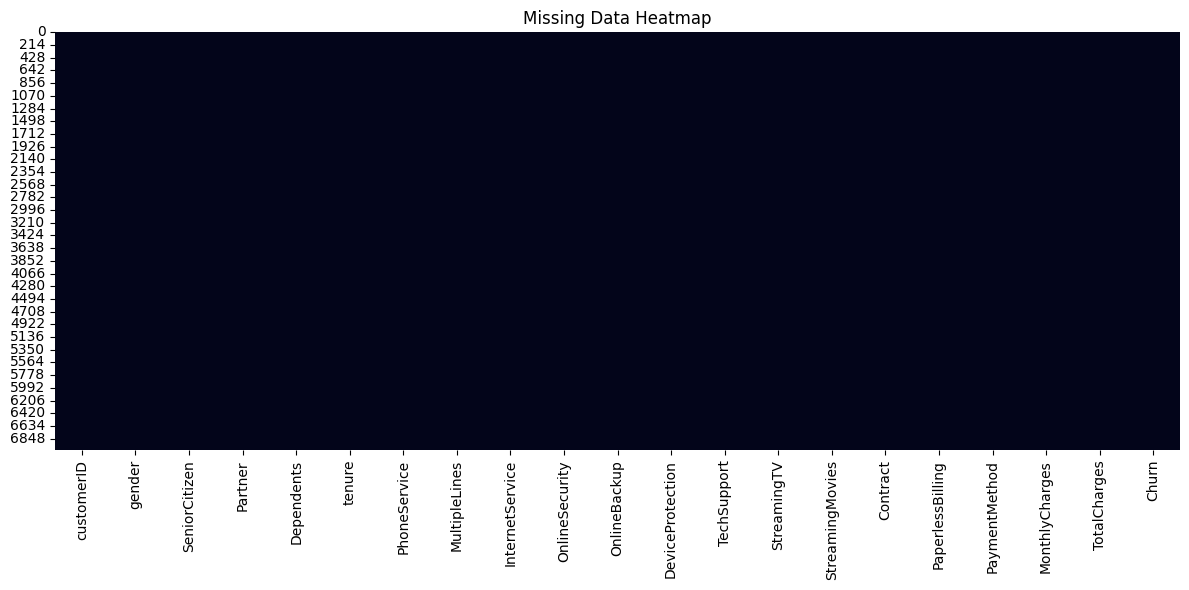

In [6]:
# Missing values analysis
mv_table = missing_values_table(df)
print(mv_table)
plot_missing_heatmap(df)

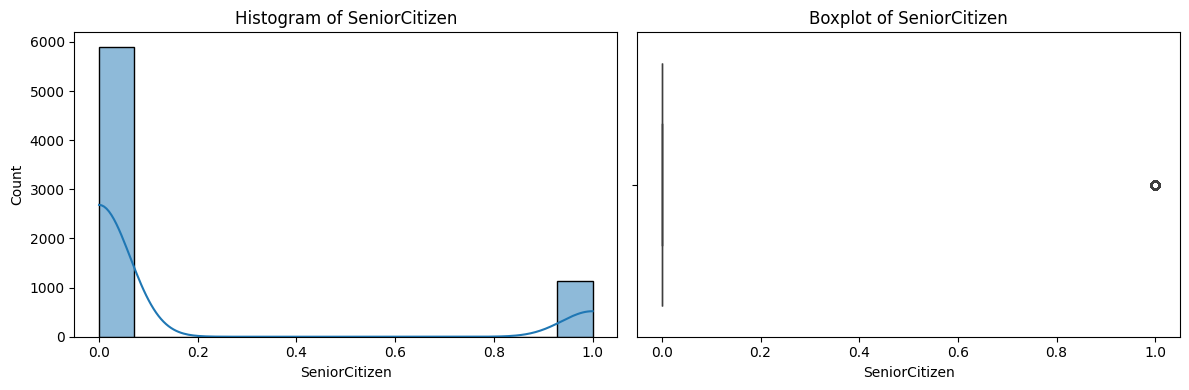

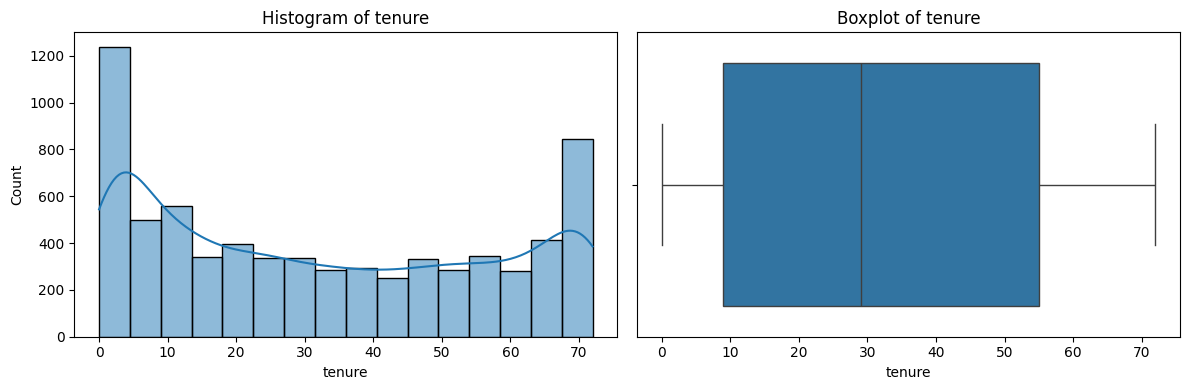

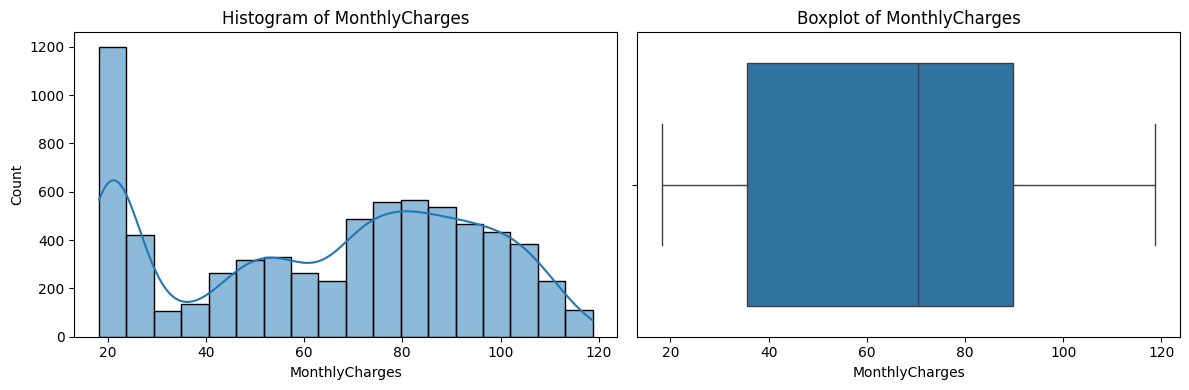

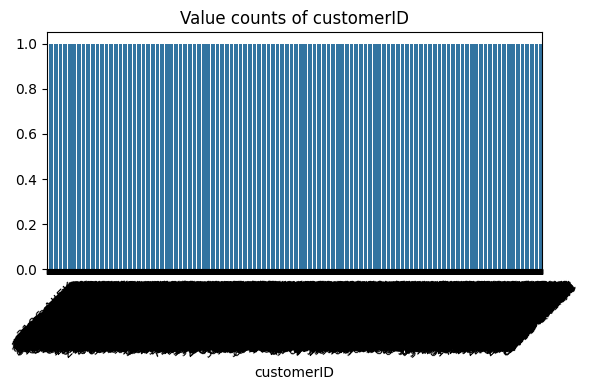

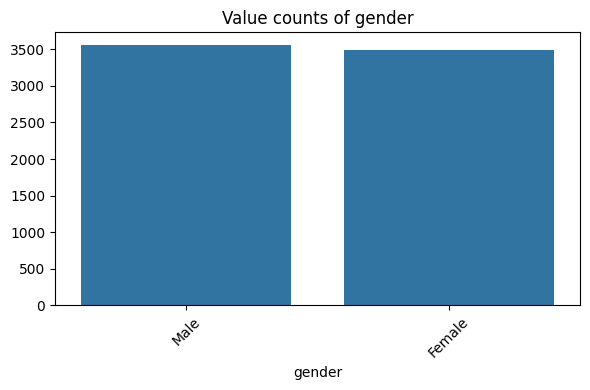

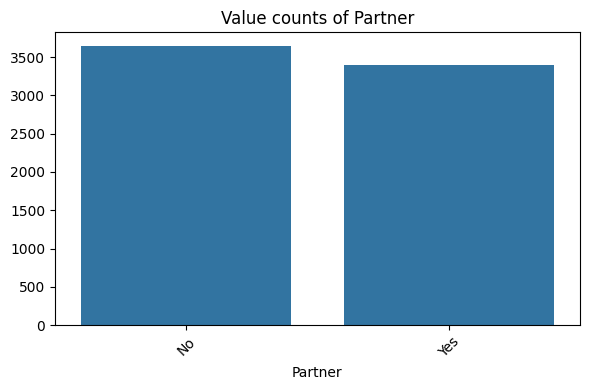

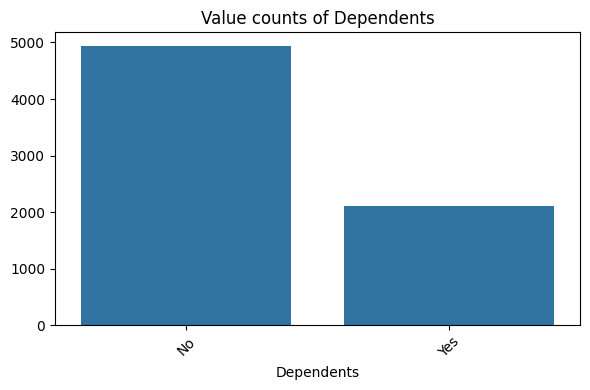

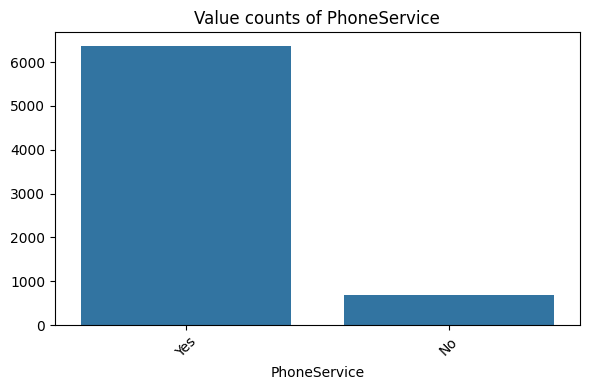

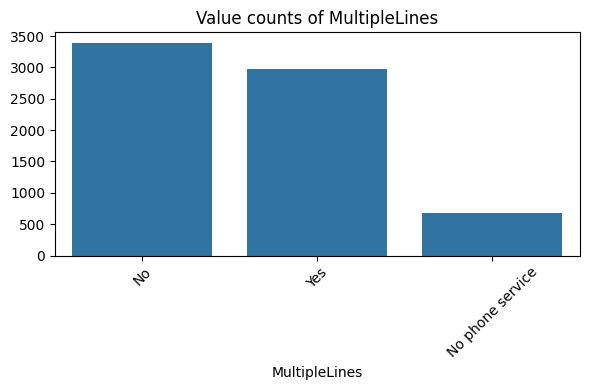

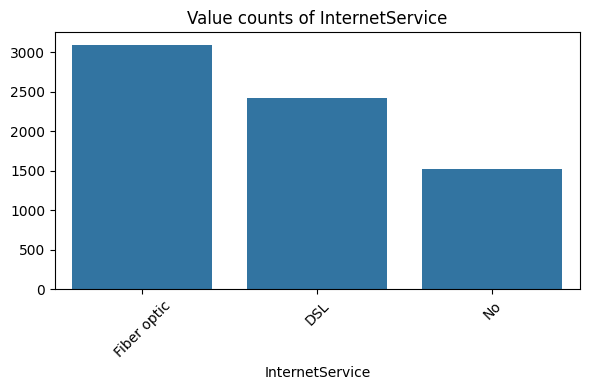

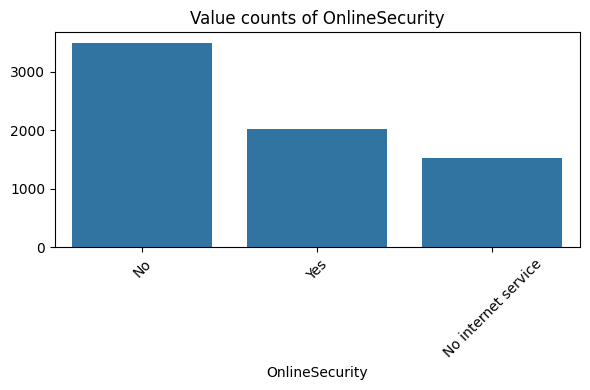

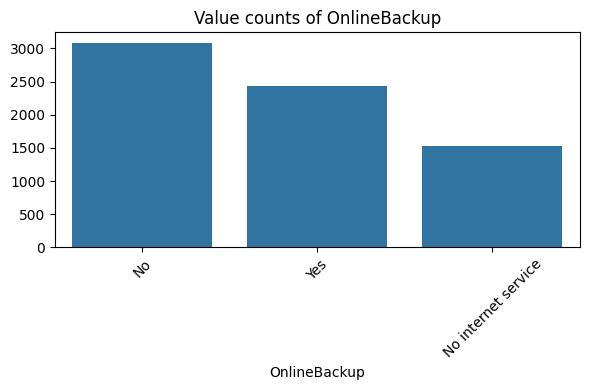

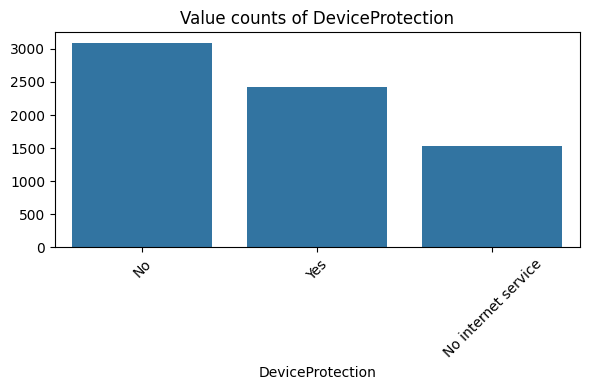

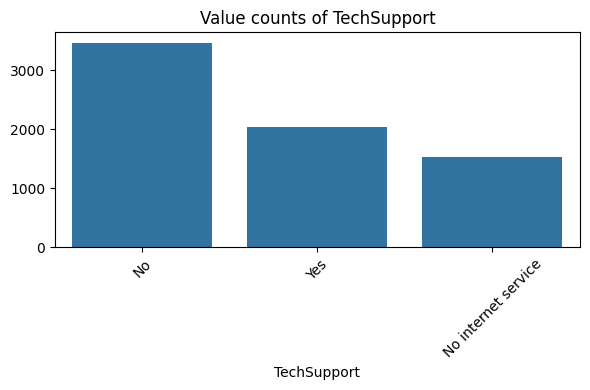

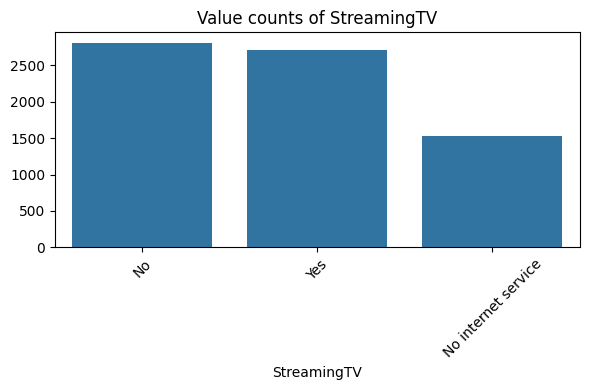

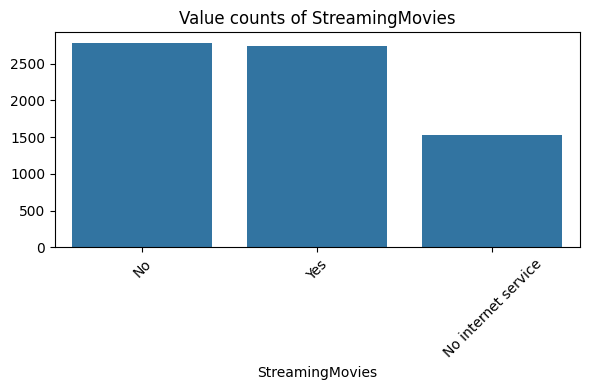

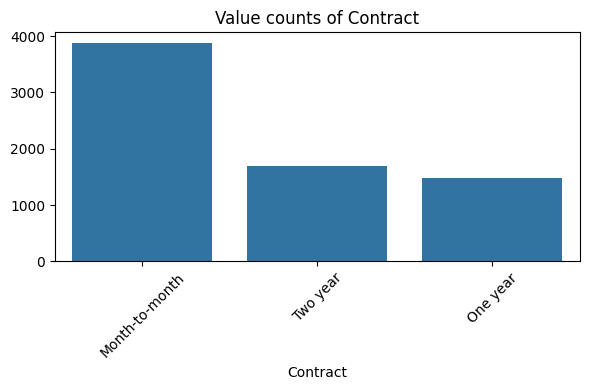

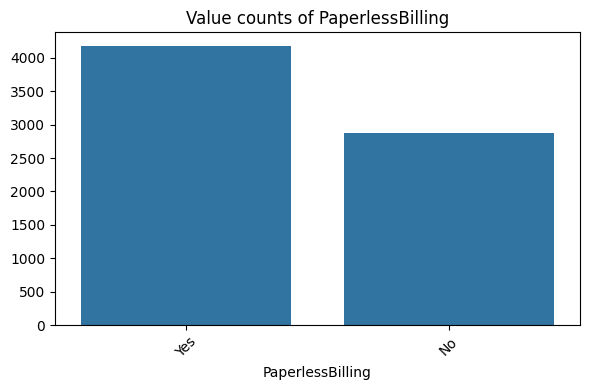

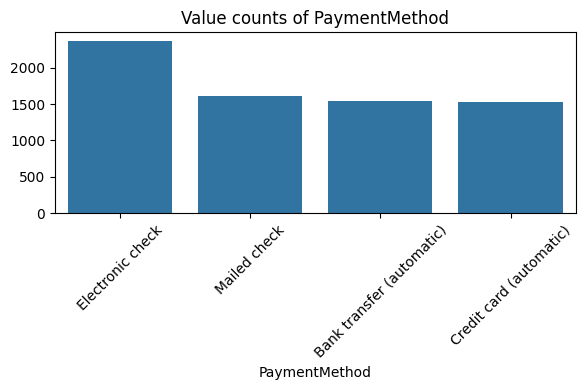

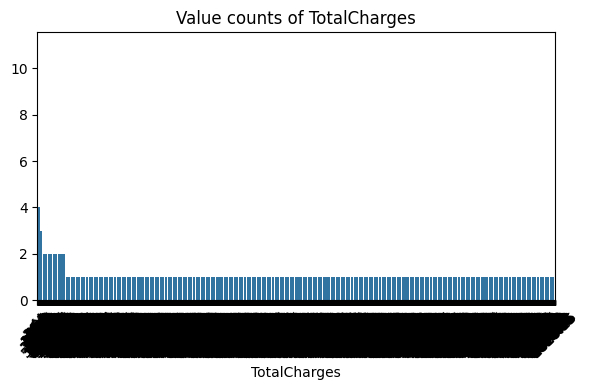

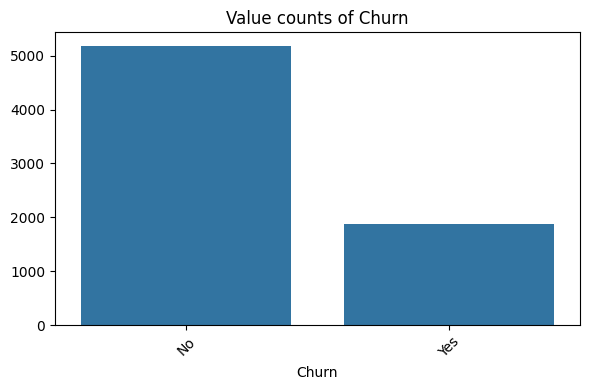

In [7]:
# Univariate analysis
plot_numeric_distributions(df, numeric_cols)
plot_categorical_counts(df, categorical_cols)

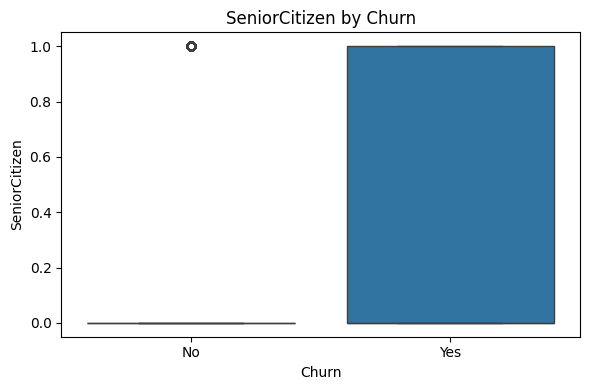

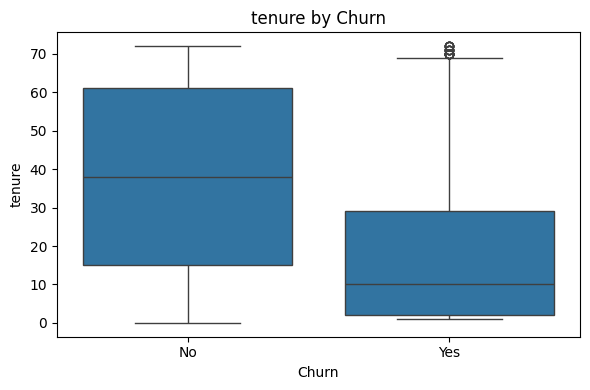

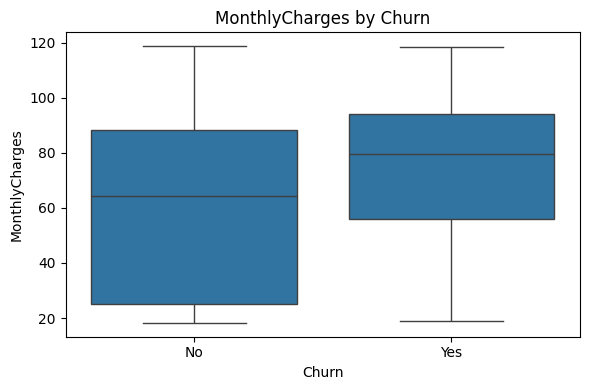

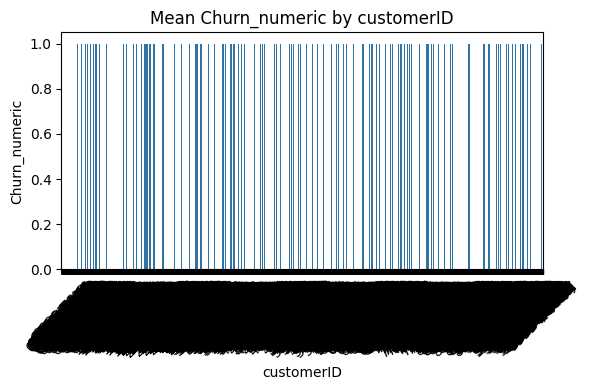

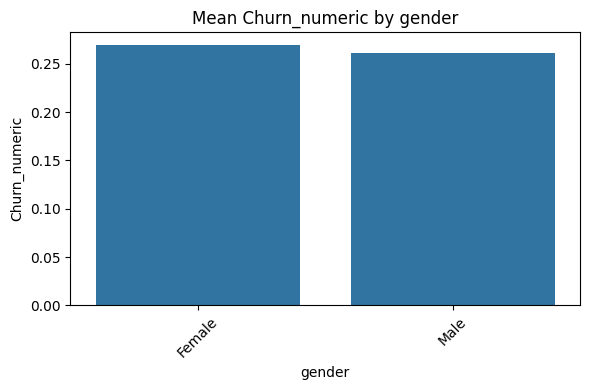

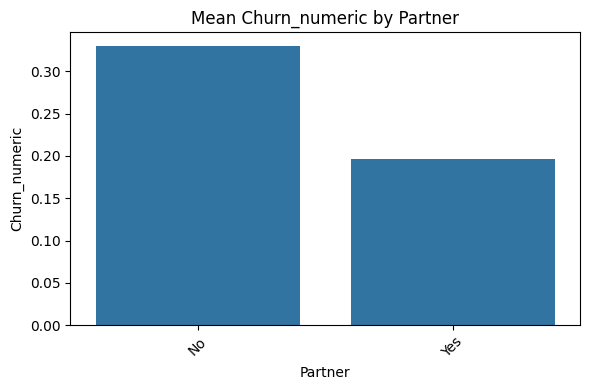

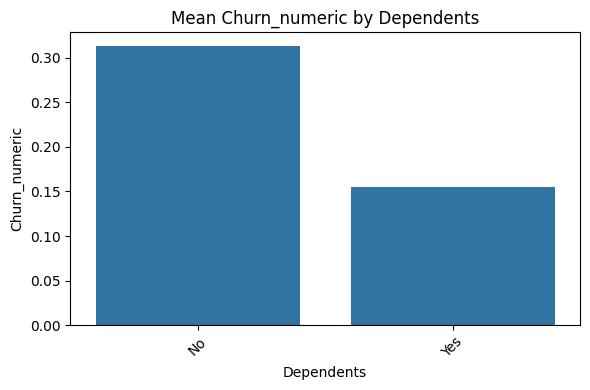

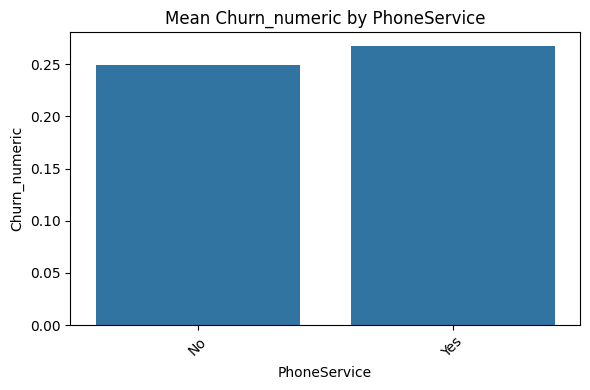

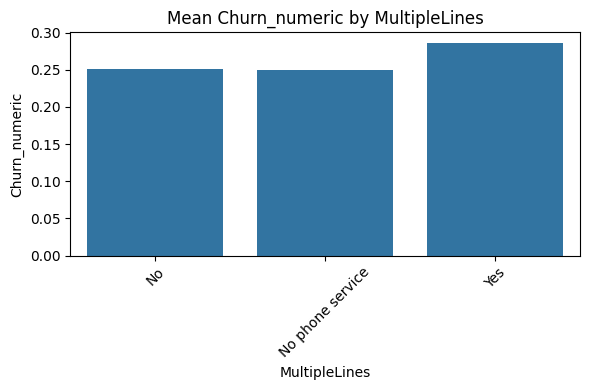

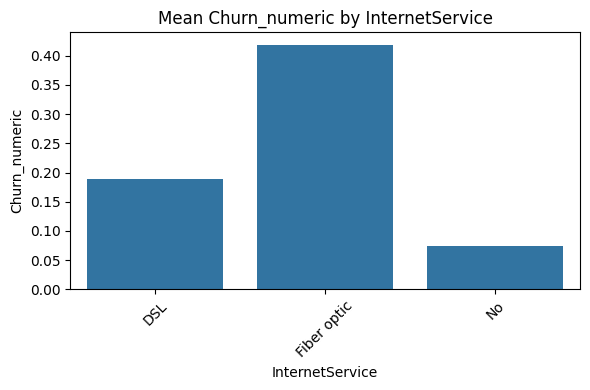

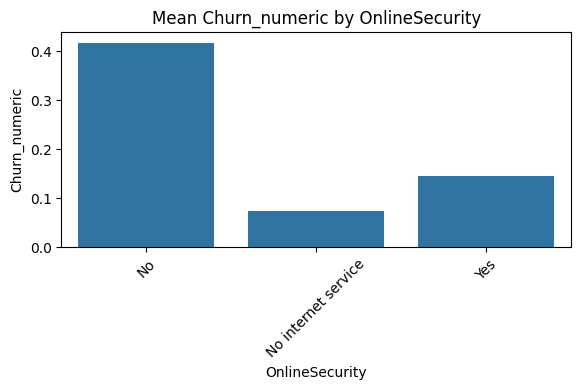

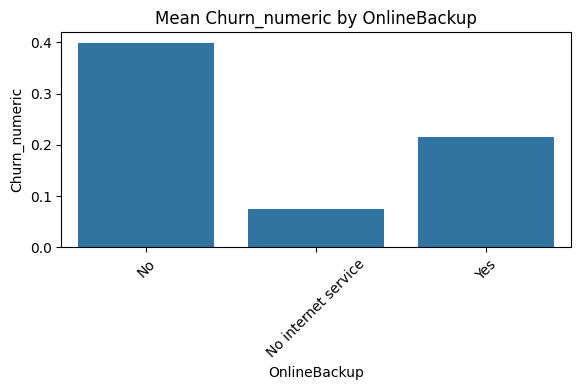

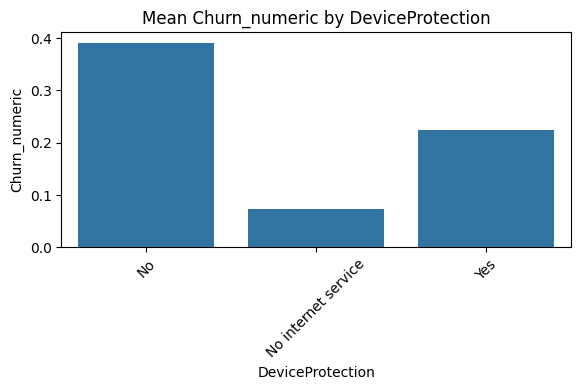

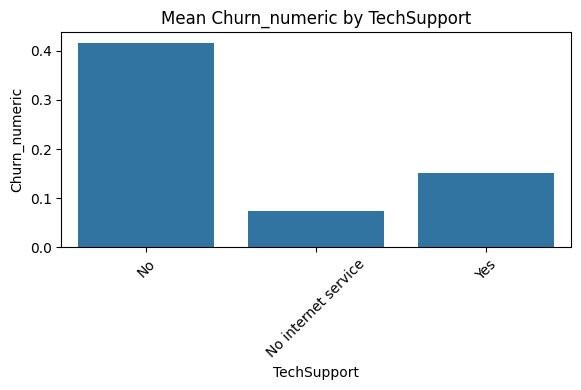

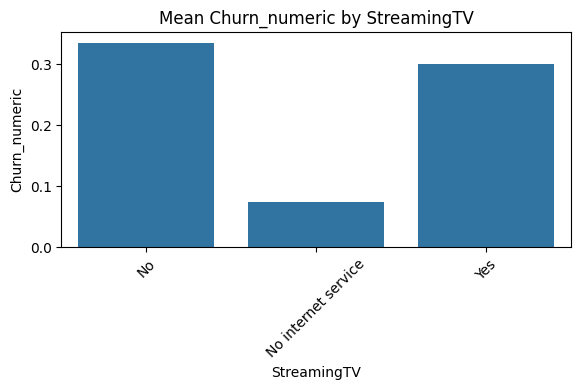

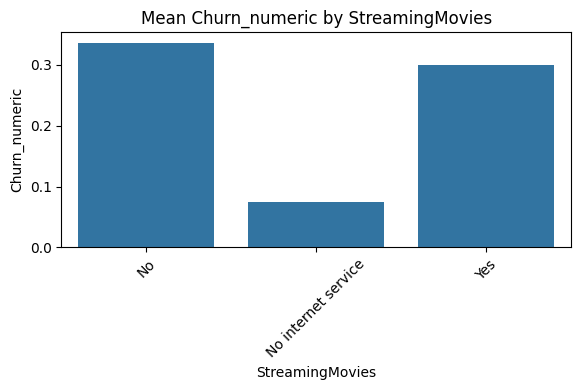

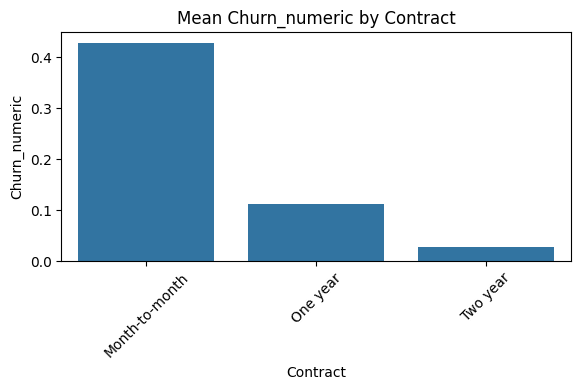

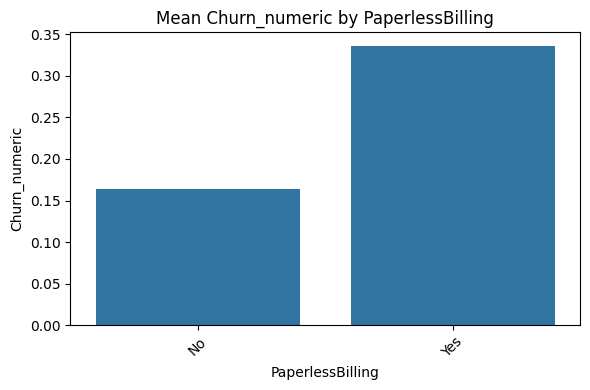

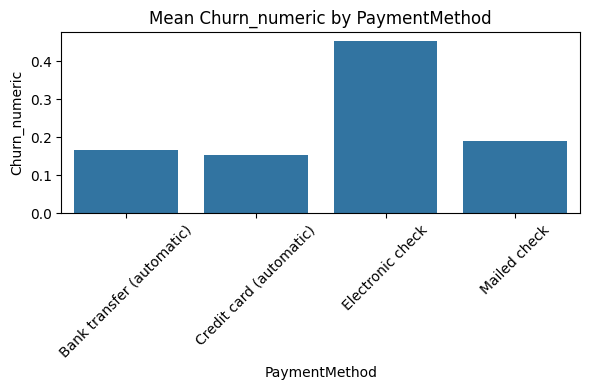

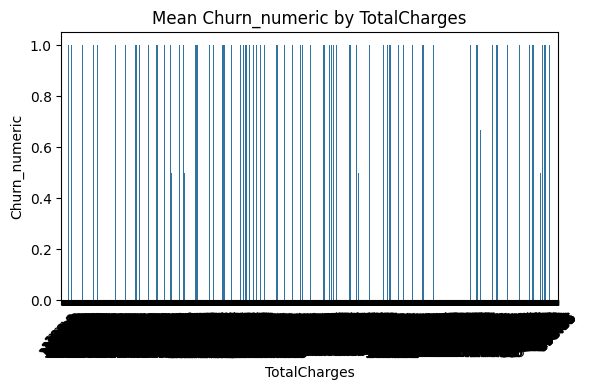

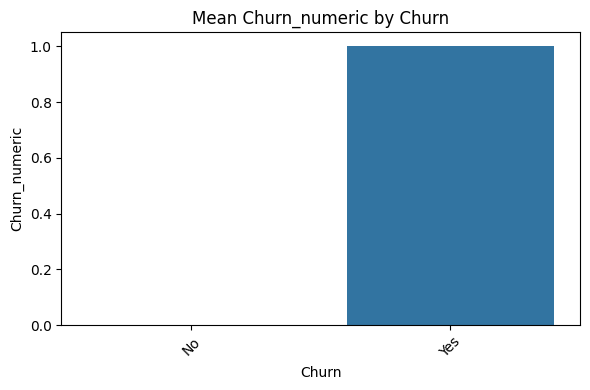

In [9]:
# Bivariate analysis vs. target
plot_numeric_vs_target(df, numeric_cols, target_col)

# Convert Churn to numeric for plotting
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
num_target_col = 'Churn_numeric'

plot_categorical_vs_target(df, categorical_cols, num_target_col)

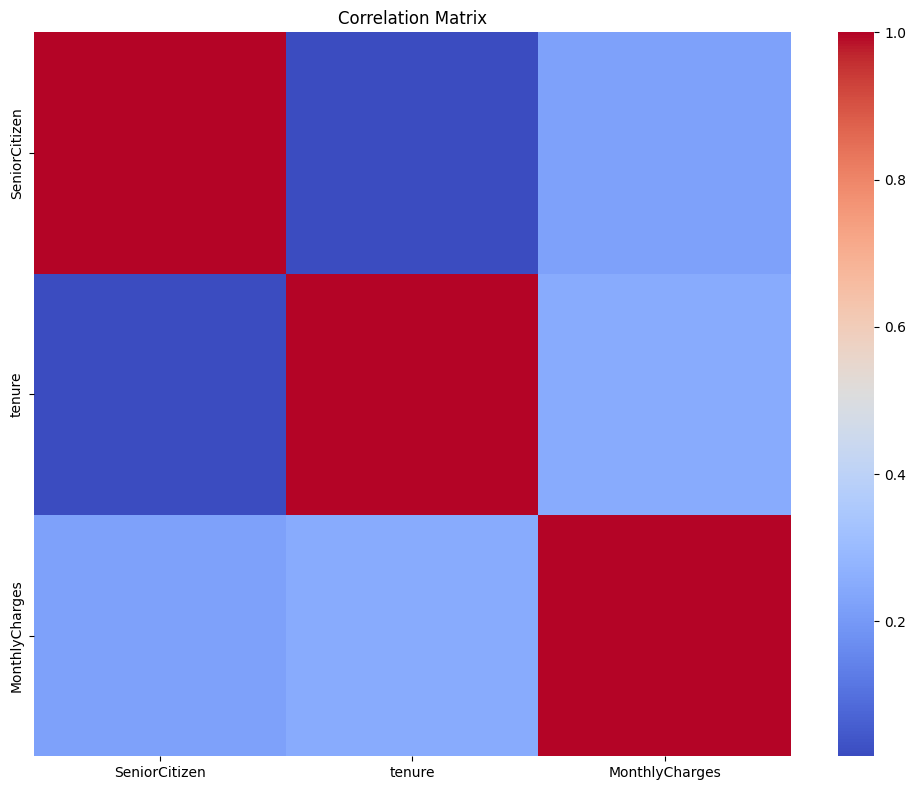

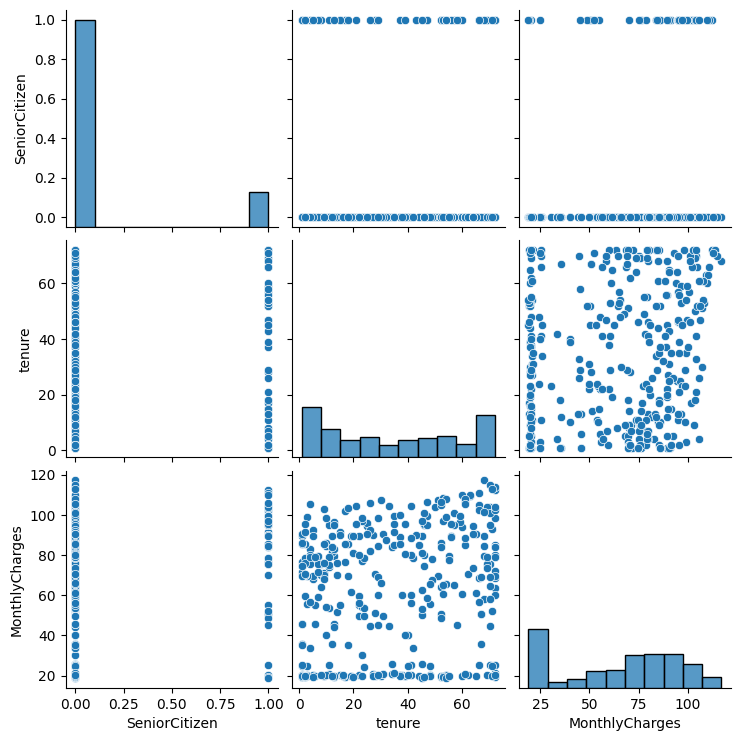

d:\NEW_VOLUME_E\BUNNY_FILES\VSCodeProjects\MLOps-Credit-Card-Fraud-Detection\data_analysis\multivariate_analysis.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
d:\NEW_VOLUME_E\BUNNY_FILES\VSCodeProjects\MLOps-Credit-Card-Fraud-Detection\data_analysis\multivariate_analysis.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
d:\NEW_VOLUME_E\BUNNY_FILES\VSCodeProjects\MLOps-Credit-Card-Fraud-Detection\data_analysis\multivariate_analysis.py:41: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
d:\NEW_VOLUME_E\BUNNY_FILES\VSCodeProjects\MLOps-Credit-Card-Fraud-Detection\data_analysis\multivariate_analysis.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
d:\NEW_VOLUME_E\BUNNY_FILES\VSCodeProjects\MLO

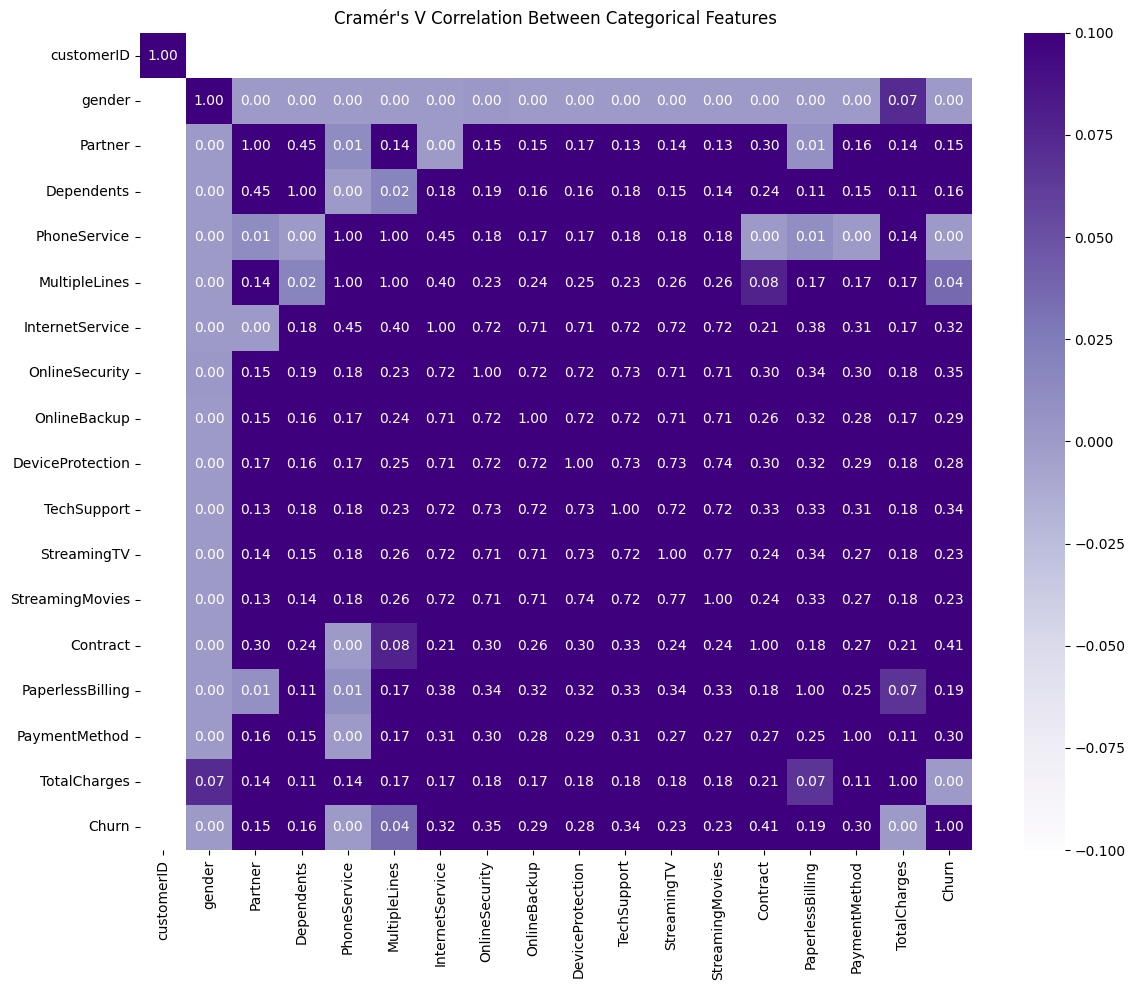

In [13]:
# Multivariate analysis
plot_correlation_matrix(df, numeric_cols)
plot_pairplot_sample(df, numeric_cols, sample_frac=0.05)
plot_cramers_v_heatmap(df, categorical_cols)

---

## 1. **Target Variable (Churn) Distribution**

* **Observation:** There is a significant class imbalance: far more customers did **not churn** than did.
* **Action:**  
    - Use **stratified train/test splits** to preserve class ratios.
    - During modeling, use **class weighting** or **resampling** (SMOTE, oversampling, or undersampling).
    - Evaluate models with metrics like **ROC-AUC, F1-score, recall, and precision** (not just accuracy).

---

## 2. **Univariate Analysis of Numeric Features**

### SeniorCitizen

* **Observation:** Most customers are not senior citizens.
    **(Only \~16.2% of customers are senior citizens – based on dataset mean of 0.1621).**
* **Action:**  
    - Treat as a binary feature.
    - Consider interaction with other features (e.g., tenure, contract type).

### Tenure

* **Observation:** Many customers have very short or very long tenure.
    **(Mean tenure is \~32.37 months, with a wide range from 0 to 72).**
* **Action:**  
    - **Feature engineering:** Bin tenure into categories (e.g., 0–12, 13–24, etc.).
    - Short tenure is often associated with higher churn (see bivariate plot below).

### MonthlyCharges

* **Observation:** Distribution is right-skewed; some customers pay much more.
    **(Mean = \~64.76, Min = 18.25, Max = 118.75, Std = \~30.09).**
* **Action:**  
    - Consider **log transformation** if needed for modeling.
    - Check for outliers.

---

## 3. **Univariate Analysis of Categorical Features**

### Dependents, PhoneService, MultipleLines

* **Observation:**  
    - Most customers have no dependents and have phone service.
    - "No phone service" and "No multiple lines" are minority categories.
    **(Examples from data: “No phone service” appears rarely.)**
* **Action:**  
    - Use **one-hot encoding** for these features.
    - Consider grouping rare categories if they are too small.

---

## 4. **Bivariate Analysis: Numeric Features vs. Churn**

### SeniorCitizen by Churn

* **Observation:** Senior citizens have a higher churn rate.
* **Action:**  
    - SeniorCitizen is predictive; keep it as a feature.

### Tenure by Churn

* **Observation:** Customers who churn tend to have much shorter tenure.
* **Action:**  
    - Use tenure as a strong predictor.
    - Consider binning tenure for more robust modeling.

### MonthlyCharges by Churn

* **Observation:** Customers who churn tend to have higher monthly charges.
* **Action:**  
    - MonthlyCharges is predictive; keep it.
    - Consider interaction with contract type or services.

---

## 5. **Bivariate Analysis: Categorical Features vs. Churn**

### InternetService, OnlineSecurity, OnlineBackup, TechSupport, Contract, PaperlessBilling

* **Observation:**  
    - **Fiber optic** customers churn more than DSL or no internet.
    - Customers **without online security, backup, or tech support** churn more.
    - **Month-to-month contracts** have much higher churn than longer contracts.
    - **Paperless billing** is associated with higher churn.
    **(Example: Customer 4 with Fiber optic and Month-to-month contract churned; customer 7039 with Two-year contract and backup services did not churn.)**
* **Action:**  
    - All these features are **strong predictors**; keep them.
    - Consider **feature interactions** (e.g., contract type × monthly charges).
    - For services (OnlineSecurity, TechSupport, etc.), group "No internet service" with "No" if appropriate.

---

## 6. **Bivariate Analysis: TotalCharges by Churn**

* **Observation:** Plot is noisy, likely due to many unique values.
    **(TotalCharges has some unexpected zero values, possibly due to recent signups. It is of type `object` and may need conversion to numeric. Examples: tenure=0 with TotalCharges=' ').**
* **Action:**  
    - Consider **binning TotalCharges** or using it in combination with tenure/monthly charges.
    - Check for missing or zero values (could indicate new customers).
    - Convert TotalCharges to numeric and impute or drop missing values if necessary.

---

## 7. **Multivariate Analysis**

### Correlation Matrix (Numeric)

* **Observation:**  
    - Tenure and MonthlyCharges are not highly correlated.
    - SeniorCitizen is not strongly correlated with other numeric features.
    **(No strong multicollinearity based on correlation matrix.)**
* **Action:**  
    - All numeric features can be used together; no need to drop for multicollinearity.

### Pairplot (Numeric)

* **Observation:**  
    - No strong linear relationships between numeric features.
* **Action:**  
    - Use all numeric features as-is.

### Cramér’s V Heatmap (Categorical)

* **Observation:**  
    - **Contract** and **InternetService** have the highest association with churn.
    - **OnlineSecurity, TechSupport, OnlineBackup** also show moderate association.
    - Most other categorical features have low association with churn.
* **Action:**  
    - Focus on the most associated features for feature selection and engineering.
    - Consider **target encoding** for highly predictive categorical features.

---

## **Summary of What To Do Next**

1. **Handle Class Imbalance:**  
      - Use stratified splits, class weights, or resampling.

2. **Feature Engineering:**  
      - Bin tenure and TotalCharges.
      - Create interaction features (e.g., Contract × MonthlyCharges).

3. **Encoding:**  
      - One-hot encode categorical variables.
      - Consider target encoding for high-cardinality or highly predictive categories.

4. **Modeling:**  
      - Use tree-based models (RandomForest, XGBoost) and logistic regression.
      - Use cross-validation with stratification.

5. **Evaluation:**  
      - Focus on ROC-AUC, F1, recall, and precision.

6. **Further EDA:**  
      - Explore feature interactions.
      - Check for missing values and outliers.
      - **Convert TotalCharges from object to float** and investigate records where tenure is zero but TotalCharges is missing or zero.

7. **Documentation:**  
      - Document which features are most predictive and why, based on your EDA.
      - **Log summary:** Dataset contains **7043 rows × 21 columns**, no duplicate rows, and **no nulls in raw form**, but **TotalCharges needs conversion for accurate use.**

---